# 1.2 Matrix decomposition
## by Luca D'Auria (ldauria@iter.es)
## Instituto Volcanológico de Canarias (INVOLCAN)
## www.involcan.org

In [1]:
# You need to run this cell only if using the online nbviewer
import sys
!conda install --yes --prefix {sys.prefix} numpy matplotlib

/bin/sh: 1: conda: not found


### Diagonal matrices

In [2]:
import numpy as np

dm = np.diag([5,3,2,1])
print(dm)

[[5 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 1]]


In [3]:
m=np.array([[2,3,1],[2,3,0],[4,-1,-1]])
print(m)
print("Diag =",np.diag(m))

[[ 2  3  1]
 [ 2  3  0]
 [ 4 -1 -1]]
Diag = [ 2  3 -1]


### Orthogonal matrices

In [4]:
Mo=np.array([[2,6,3],[3,2,-6],[6,-3,2]])/7

print(Mo)

[[ 0.28571429  0.85714286  0.42857143]
 [ 0.42857143  0.28571429 -0.85714286]
 [ 0.85714286 -0.42857143  0.28571429]]


#### $M_1 = M_o M_o^T$
#### $M_2 = M_o^T M_o$

In [5]:
M1=np.dot(Mo,Mo.T)
print("M1")
print(np.round(M1))

M2=np.dot(Mo,Mo.T)
print("M2")
print(np.round(M2))

M1
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]
M2
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


## Matrix as linear operators

In [6]:
import matplotlib.pyplot as plt

M=np.array([[1,1],[0,2]])
print("M")
print(M)

# Original vector
v=np.array([0.5,1])

# Transformed vectors
vt=np.dot(M,v.T)
print("vt=",vt)

# Plot
plt.arrow(0,0,v[0],v[1], length_includes_head=True, head_width=0.05, fc='k', ec='k')
plt.arrow(v[0],v[1],vt[0],vt[1], length_includes_head=True, head_width=0.05, fc='b', ec='b')

# Equal aspect ratio
plt.xlim([0,3])
plt.ylim([0,3])
plt.gca().set_aspect('equal','box')

plt.show()

M
[[1 1]
 [0 2]]
vt= [1.5 2. ]


<Figure size 640x480 with 1 Axes>

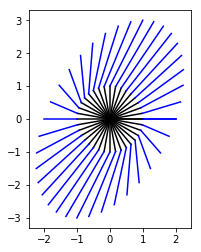

In [7]:
# Original vectors
ang=np.linspace(0,2*np.pi,37)
x=np.cos(ang)
y=np.sin(ang)
v=np.vstack((x,y))

# Transformed vectors
vt=np.dot(M,v)

for i in range(len(ang)):
    # Plot original vectors
    plt.plot([0,v[0,i]],[0,v[1,i]],'k')
    # Plotting transformed vector
    plt.plot([v[0,i],v[0,i]+vt[0,i]],[v[1,i],v[1,i]+vt[1,i]],'b')

# Equal aspect ratio
plt.gca().set_aspect('equal', 'box')

plt.show()

### Pure stretching

M
[[2.  0. ]
 [0.  0.7]]


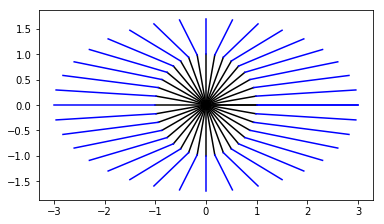

In [8]:
M=np.diag([2,0.7])

print("M")
print(M)

# Original vectors
ang=np.linspace(0,2*np.pi,37)
x=np.cos(ang)
y=np.sin(ang)
v=np.vstack((x,y))

# Transformed vectors
vt=np.dot(M,v)

# Plot vectors
for i in range(len(ang)):
    plt.plot([0,v[0,i]],[0,v[1,i]],'k')
    plt.plot([v[0,i],v[0,i]+vt[0,i]],[v[1,i],v[1,i]+vt[1,i]],'b')

# Equal aspect ratio
plt.gca().set_aspect('equal', 'box')

plt.show()

### Pure rotation

M
[[ 0.76604444 -0.64278761]
 [ 0.64278761  0.76604444]]


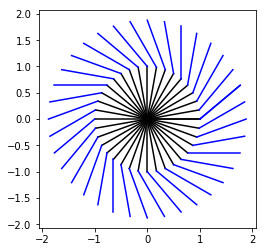

In [9]:
# Rotation of 40º counterclockwise
ang=40*np.pi/180

M=np.array([[np.cos(ang),-np.sin(ang)],[np.sin(ang),np.cos(ang)]])

print("M")
print(M)

# Original vectors
ang=np.linspace(0,2*np.pi,37)
x=np.cos(ang)
y=np.sin(ang)
v=np.vstack((x,y))

# Transformed vectors
vt=np.dot(M,v)

# Plot vectors
for i in range(len(ang)):
    plt.plot([0,v[0,i]],[0,v[1,i]],'k')
    plt.plot([v[0,i],v[0,i]+vt[0,i]],[v[1,i],v[1,i]+vt[1,i]],'b')

plt.gca().set_aspect('equal', 'box')

plt.show()

## Eigenvalues and eigenvectors

In [10]:
M=np.array([[1,1],[0,2]])

print("M")
print(M)

evalue, evect = np.linalg.eig(M)

evect1=evect[:,0]
evect2=evect[:,1]

print("evalue=",evalue)
print("evect 1 =",evect1)
print("evect 2 =",evect2)

M
[[1 1]
 [0 2]]
evalue= [1. 2.]
evect 1 = [1. 0.]
evect 2 = [0.70710678 0.70710678]


In [11]:
# Are eigenvector normalized?
print(np.linalg.norm(evect1))
print(np.linalg.norm(evect2))

1.0
0.9999999999999999


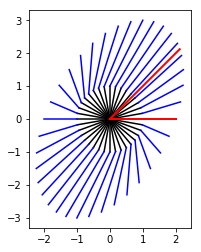

In [12]:
# Transformed vectors
vt=np.dot(M,v)

# Transformed eigenvectors
evect1t=np.dot(M,evect1.T)
evect2t=np.dot(M,evect2.T)

# Plot vectors
for i in range(len(ang)):
    plt.plot([0,v[0,i]],[0,v[1,i]],'k')
    plt.plot([v[0,i],v[0,i]+vt[0,i]],[v[1,i],v[1,i]+vt[1,i]],'b')

# Plotting eigenvectors
plt.plot([0,evect1[0],evect1[0]+evect1t[0]],[0,evect1[1],evect1[1]+evect1t[1]],'r', linewidth=2)
plt.plot([0,evect2[0],evect2[0]+evect2t[0]],[0,evect2[1],evect2[1]+evect2t[1]],'r', linewidth=2)

plt.gca().set_aspect('equal', 'box')

plt.show()

### Uses of eigenvalues

#### 1) Trace of a matrix $Tr\left(\mathbf{M}\right) = \sum M_{ii} = \sum \lambda_i$

In [13]:
tr1=np.sum(np.diag(M))
tr2=np.sum(evalue)

print("tr1=",tr1," tr2=",tr2)

tr1= 3  tr2= 3.0


#### Determinant of a matrix $det\left( \mathbf{M}\right) = \prod \lambda_i$

In [14]:
det1=np.linalg.det(M)
det2=np.prod(evalue)

print("det1=",det1," det2=",det2)

det1= 2.0  det2= 2.0


### Eigendecomposition of a matrix

$\mathbf{M} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^{-1}$

In [15]:
evalue, V = np.linalg.eig(M)
Lambda = np.diag(evalue)

Vi=np.linalg.inv(V)

# Recostruction of M from its eigendecomposition
MM = np.dot(V,np.dot(Lambda,Vi))

print("M")
print(M)
print("MM")
print(MM)

M
[[1 1]
 [0 2]]
MM
[[1. 1.]
 [0. 2.]]


### Diagonalizable matrices

In [16]:
# Rotation matrix: an example of non diagonalizable matrix

ang=30*np.pi/180
M=np.array([[np.cos(ang),-np.sin(ang)],[np.sin(ang),np.cos(ang)]])

print("M")
print(M)

evalue, evect = np.linalg.eig(M)

evect1=evect[:,0]
evect2=evect[:,1]

print("evalue=",evalue)
print("evect 1 =",evect1)
print("evect 2 =",evect2)

M
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
evalue= [0.8660254+0.5j 0.8660254-0.5j]
evect 1 = [0.70710678+0.j         0.        -0.70710678j]
evect 2 = [0.70710678-0.j         0.        +0.70710678j]


### Using the eigendecomposition for matrix inversion
$\mathbf{M}^{-1} = \mathbf{V} \mathbf{\Lambda}^{-1} \mathbf{V}^{-1}$

In [17]:
Lambda_i = np.diag(1/evalue)

Mi = np.dot(V,np.dot(Lambda_i,Vi))

# Verify Mi is the inverse of M
print(np.round(np.dot(M,Mi)))

[[ 1.-0.j -0.+1.j]
 [ 0.-0.j  1.+1.j]]


## Singular value decomposition
$\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$

In [18]:
M=np.array([[2,1],[2,2],[-1,0]])

U, S, VT = np.linalg.svd(M)

print("U ",U.shape)
print("S ",S.shape)
print("VT ",VT.shape)

U  (3, 3)
S  (2,)
VT  (2, 2)


In [19]:
# Let's check it
Sigma=np.zeros((3,2))
Sigma[:2, :2] = np.diag(S)

print("Sigma")
print(Sigma)

MM=np.dot(U,np.dot(Sigma,VT))

print("M")
print(M)

print("MM")
print(np.round(MM))

Sigma
[[3.65028154 0.        ]
 [0.         0.82185442]
 [0.         0.        ]]
M
[[ 2  1]
 [ 2  2]
 [-1  0]]
MM
[[ 2.  1.]
 [ 2.  2.]
 [-1. -0.]]


In [20]:
# Is U orthogonal?
print(np.round(np.dot(U,U.T)))

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


In [21]:
# Is V orthogonal?
print(np.round(np.dot(VT,VT.T)))

[[1. 0.]
 [0. 1.]]


### Pseudoinverse with SVD
Definition: $\mathbf{M}^{-g} \mathbf{M} = \mathbf{I}$

Using SVD: $\mathbf{M}^{-g} = \mathbf{V} \mathbf{\Sigma}^{-1} \mathbf{U}^T$

In [22]:
V=VT.T

Sigma_i = np.zeros((2,3))
Sigma_i[:2, :2] = np.diag(1./S)

UT = U.T

Mg = np.dot(V,np.dot(Sigma_i,UT))

print(np.round(np.dot(M,Mg)))

[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
